In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
Big_mart_data = pd.read_csv('/content/drive/MyDrive/Datasets/Train.csv')

In [ ]:
Big_mart_data.head()

,Product_Id,Product_weight,Fat_Content,Visibility,Prod_Type,Price,Outlet_Identifier,Product_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Product_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
4,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [ ]:
Big_mart_data.shape

(1406, 12)

# getting information about the dataset

In [ ]:
Big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Product_Id                  1406 non-null   object 
 1   Product_weight              1215 non-null   float64
 2   Fat_Content                 1406 non-null   object 
 3   Visibility                  1406 non-null   float64
 4   Prod_Type                   1406 non-null   object 
 5   Price                       1406 non-null   float64
 6   Outlet_Identifier           1406 non-null   object 
 7   Product_Establishment_Year  1406 non-null   int64  
 8   Outlet_Size                 1164 non-null   object 
 9   Outlet_Location_Type        1406 non-null   object 
 10  Outlet_Type                 1406 non-null   object 
 11  Product_Outlet_Sales        1406 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 131.9+ KB


CAtegorical Feartures

-
-Fat_Content
-Prod_Type   
-Prod_Type   
-Outlet_Identifier           
-Outlet_Size   
-outlet_Type              


checking missing values

In [ ]:
Big_mart_data.isnull().sum()

Product_Id                      0
Product_weight                191
Fat_Content                     0
Visibility                      0
Prod_Type                       0
Price                           0
Outlet_Identifier               0
Product_Establishment_Year      0
Outlet_Size                   242
Outlet_Location_Type            0
Outlet_Type                     0
Product_Outlet_Sales            0
dtype: int64

In [ ]:
# mean value of product_weight column
Big_mart_data['Product_weight'].mean()

12.787794238683126

In [ ]:
# filling the missing values in item weight column with "Mean" Value
Big_mart_data['Product_weight'].fillna(Big_mart_data['Product_weight'].mean(),inplace=True)

In [ ]:
Big_mart_data.isnull().sum()

Product_Id                      0
Product_weight                  0
Fat_Content                     0
Visibility                      0
Prod_Type                       0
Price                           0
Outlet_Identifier               0
Product_Establishment_Year      0
Outlet_Size                   242
Outlet_Location_Type            0
Outlet_Type                     0
Product_Outlet_Sales            0
dtype: int64

Handling Missing Values

Mean --> average value : for handling Numerical data

Mode--> most repeated value : for handling Categorical data or text data

replace the missing values in outlet size with mode

In [ ]:
mode_of_outlet_size = Big_mart_data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))



In [ ]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small              High            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
missing_values =  Big_mart_data['Outlet_Size'].isnull()

In [ ]:
print(missing_values)

0       False
1       False
2       False
3       False
4       False
        ...  
1401    False
1402     True
1403    False
1404    False
1405    False
Name: Outlet_Size, Length: 1406, dtype: bool


In [ ]:
Big_mart_data.loc[missing_values, 'Outlet_Size'] = Big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])


HAndled all the null values data cleaning Completed

In [ ]:
Big_mart_data.isnull().sum()

Product_Id                    0
Product_weight                0
Fat_Content                   0
Visibility                    0
Prod_Type                     0
Price                         0
Outlet_Identifier             0
Product_Establishment_Year    0
Outlet_Size                   0
Outlet_Location_Type          0
Outlet_Type                   0
Product_Outlet_Sales          0
dtype: int64

In [ ]:
#  get statistics data
Big_mart_data.describe()

,Product_weight,Visibility,Price,Product_Establishment_Year,Product_Outlet_Sales
count,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000
mean,12.787794,0.063550,139.955624,1994.581081,2257.065788
std,4.324052,0.048686,62.938569,8.654469,1678.811979
min,4.555000,0.000000,31.490000,1985.000000,36.619000
25%,9.195000,0.027060,92.771850,1987.000000,886.346250
50%,12.787794,0.050668,141.800900,1997.000000,1953.124300
75%,16.100000,0.091442,183.951600,2002.000000,3199.169000
max,21.250000,0.306543,266.688400,2009.000000,10256.649000


Numerical features

In [ ]:
sns.set()

<Axes: xlabel='Outlet_Size', ylabel='count'>

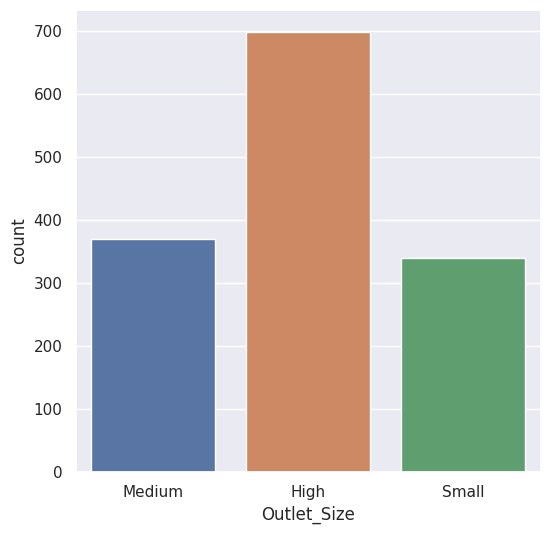

In [ ]:
# Outlet_Size
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=Big_mart_data)

<ipython-input-19-6e52c14b980e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Big_mart_data['Product_weight'])


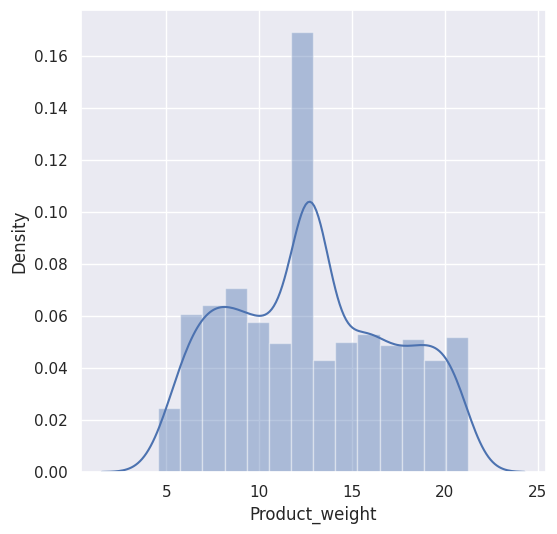

In [ ]:
# product weight distribution
plt.figure(figsize=(6,6))
sns.distplot(Big_mart_data['Product_weight'])
plt.show()

<ipython-input-20-4cfb675d286b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Big_mart_data['Visibility'])


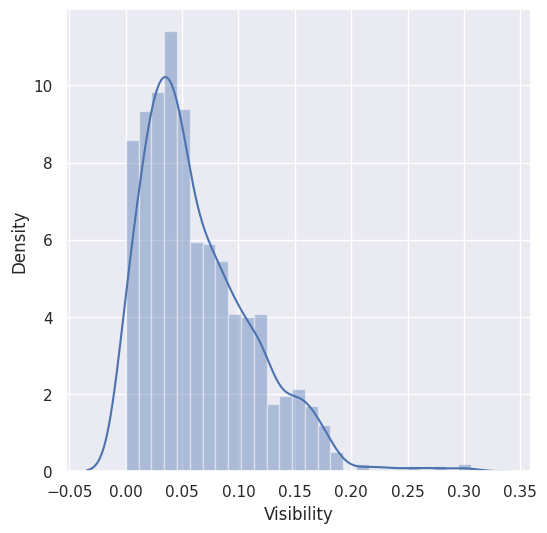

In [ ]:
# visibility
plt.figure(figsize=(6,6))
sns.distplot(Big_mart_data['Visibility'])
plt.show()

<ipython-input-22-e53f274d15e9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Big_mart_data['Price'])


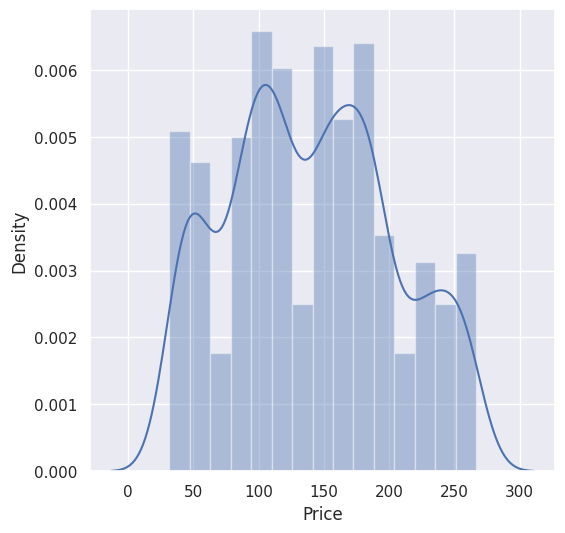

In [ ]:
# profit
plt.figure(figsize=(6,6))
sns.distplot(Big_mart_data['Price'])
plt.show()

<ipython-input-23-9aa026f6761d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Big_mart_data['Product_Outlet_Sales'])


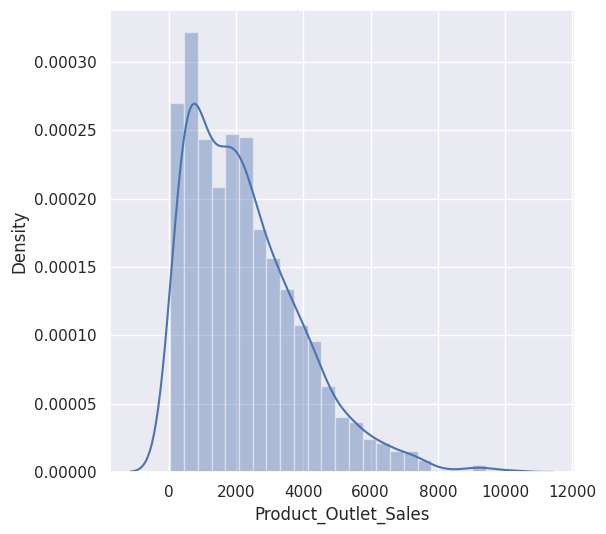

In [ ]:
   #Product_Outlet_Sales
plt.figure(figsize=(6,6))
sns.distplot(Big_mart_data['Product_Outlet_Sales'])
plt.show()

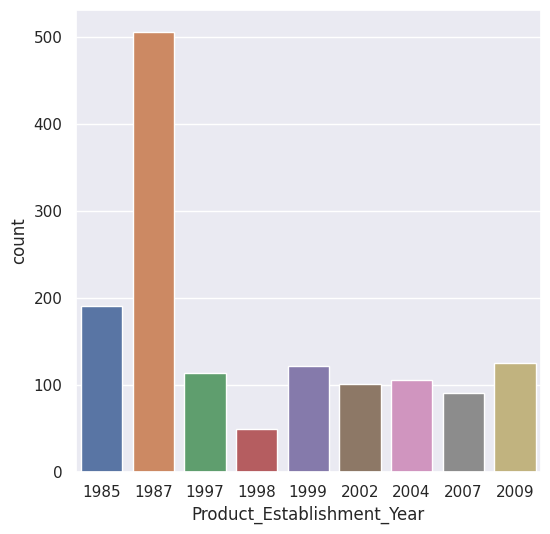

In [ ]:
# Outlet establishment year
plt.figure(figsize=(6,6))
sns.countplot(x='Product_Establishment_Year',data = Big_mart_data)
plt.show()

Categorical Features

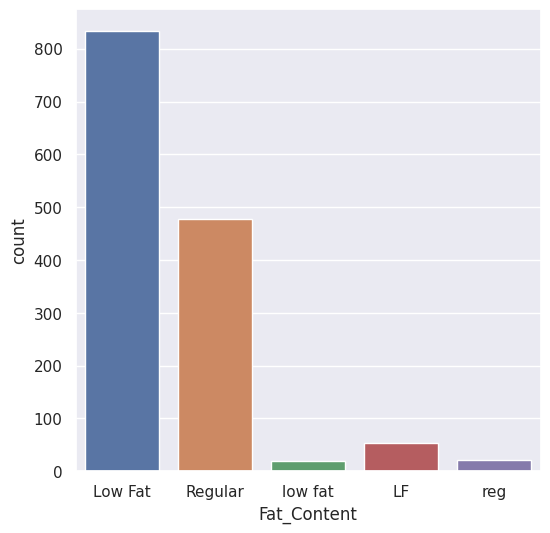

In [ ]:
# Fat_Content
plt.figure(figsize=(6,6))
sns.countplot(x='Fat_Content',data = Big_mart_data)
plt.show()

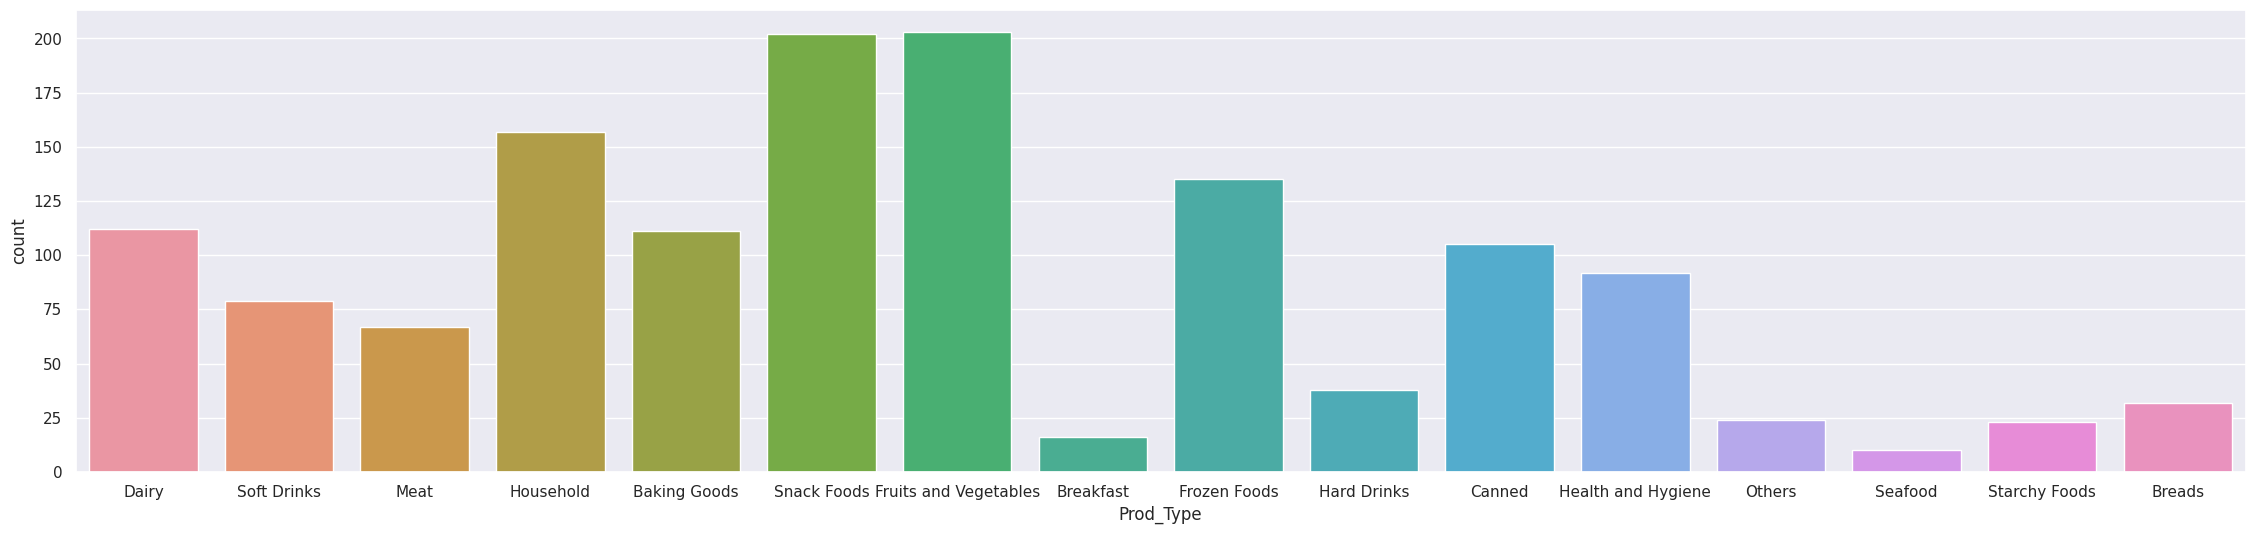

In [ ]:
# product type
plt.figure(figsize=(28,6))
sns.countplot(x='Prod_Type',data = Big_mart_data)
plt.show()

data Preprocessing

In [ ]:
Big_mart_data['Fat_Content'].value_counts()

Low Fat    833
Regular    478
LF          54
reg         22
low fat     19
Name: Fat_Content, dtype: int64

In [ ]:
Big_mart_data['Outlet_Size'].value_counts()

High      698
Medium    369
Small     339
Name: Outlet_Size, dtype: int64

In [ ]:
Big_mart_data.replace({'Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace = True)

In [ ]:
Big_mart_data['Fat_Content'].value_counts()

Low Fat    906
Regular    500
Name: Fat_Content, dtype: int64

Label encoding since we need to convert the categorical data to numbers


In [ ]:
#Encoder initaited for data transformation of categorical type
encoder = LabelEncoder()

In [ ]:
Big_mart_data['Product_Id'] = encoder.fit_transform(Big_mart_data['Product_Id'])
Big_mart_data['Fat_Content'] = encoder.fit_transform(Big_mart_data['Fat_Content'])
Big_mart_data['Outlet_Identifier'] = encoder.fit_transform(Big_mart_data['Outlet_Identifier'])
Big_mart_data['Outlet_Size'] = encoder.fit_transform(Big_mart_data['Outlet_Size'])
Big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(Big_mart_data['Outlet_Location_Type'])
Big_mart_data['Prod_Type'] = encoder.fit_transform(Big_mart_data['Prod_Type'])
Big_mart_data['Outlet_Type'] = encoder.fit_transform(Big_mart_data['Outlet_Type'])


In [ ]:
Big_mart_data.head()

,Product_Id,Product_weight,Fat_Content,Visibility,Prod_Type,Price,Outlet_Identifier,Product_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Product_Outlet_Sales
0,103,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,7,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,429,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,815,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
4,486,10.395,1,0.000000,0,51.4008,3,2009,1,2,2,556.6088


In [ ]:
X = Big_mart_data.drop(columns='Product_Outlet_Sales',axis=1)
Y = Big_mart_data['Product_Outlet_Sales']

In [ ]:
print(X)

      Product_Id  Product_weight  Fat_Content  Visibility  Prod_Type  \
0            103           9.300            0    0.016047          4   
1              7           5.920            1    0.019278         14   
2            429          17.500            0    0.016760         10   
3            815           8.930            0    0.000000          9   
4            486          10.395            1    0.000000          0   
...          ...             ...          ...         ...        ...   
1401         234           6.865            0    0.056783         13   
1402         565           8.380            1    0.046982          0   
1403         857          10.600            0    0.035186          8   
1404         441           7.210            1    0.145221         13   
1405          36          14.800            0    0.044878         14   

         Price  Outlet_Identifier  Product_Establishment_Year  Outlet_Size  \
0     249.8092                  9                        

In [ ]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        994.7052
4        556.6088
          ...    
1401    2778.3834
1402     549.2850
1403    1193.1136
1404    1845.5976
1405     765.6700
Name: Product_Outlet_Sales, Length: 1406, dtype: float64


Splitting the data into Training data & Testing Data   where product outlet sales is the target column

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1406, 11) (1124, 11) (282, 11)


machine learning model training XGB REgressor

In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

XGB Regressor Training data

In [ ]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.993133551492392


XGB Regressor Test data

In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [ ]:
print('R Squared value = ', r2_test)

R Squared value =  0.45062493915512813


linear regression Training data

In [ ]:
regressorLR = LinearRegression()

# Fit the model to your training data
regressorLR.fit(X_train, Y_train)

# Make predictions on new data
train_data_predictionLR = regressorLR.predict(X_train)

In [ ]:
# R squared value for gradient boost
r2_trainLR = metrics.r2_score(Y_train, train_data_predictionLR)

In [ ]:
print('R Squared value = ', r2_trainLR)

R Squared value =  0.5030716312872537


linear regression Training data

In [ ]:
train_data_predictionLR = regressorLR.predict(X_test)

In [ ]:
# R squared value for gradient boost
r2_testLR = metrics.r2_score(Y_test, train_data_predictionLR)

In [ ]:
print('R Squared value = ', r2_testLR)

R Squared value =  0.52605405132515


Gradient boost regression training data

In [ ]:
regressor2 = GradientBoostingRegressor()

# Fit the model to your training data
regressor2.fit(X_train, Y_train)

# Make predictions on new data
training_data_prediction2 = regressor2.predict(X_train)

In [ ]:
r2_trainGB = metrics.r2_score(Y_train, training_data_prediction2)

In [ ]:
print('R Squared value = ', r2_trainGB)

R Squared value =  0.7107194714146807


gradient boost regression test data

In [ ]:

# Fit the model to your test data
regressor2.fit(X_test, Y_test)

# Make predictions on new data
test_data_prediction2 = regressor2.predict(X_test)

In [ ]:
r2_testGB = metrics.r2_score(Y_test, test_data_prediction2)

In [ ]:
print('R Squared value = ', r2_testGB)

R Squared value =  0.888200906730306
